In [30]:
import numpy as np
import math 
import cmath
import abipy
from abipy.electrons.scr import ScrFile
import time
import matplotlib.pyplot as plt
import pointcloud as pc
from scipy.interpolate import RegularGridInterpolator
import plotly.graph_objects as go
%load_ext autoreload
%autoreload 2
import Fourier_tool as Ft
import XGChi0 
import MatrixCharacteristic
from abipy import abilab
import abipy.data as abidata
from abipy.abilab import Structure
import random
from abipy.abilab import abiopen
import abipy.data as abidata

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
filename = "Bulk2Atomso_DS1_GSR.nc"

In [ ]:
with abiopen(abidata.ref_file("si_nscf_GSR.nc")) as nscf_file:
    nscf_ebands = nscf_file.ebands


In [31]:
with abiopen(filename) as ncfile:
    ebands = ncfile.ebands
ebands.plotly(with_gaps=False)

TypeError: float() argument must be a string or a number, not 'Lattice'

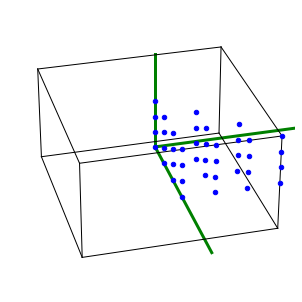

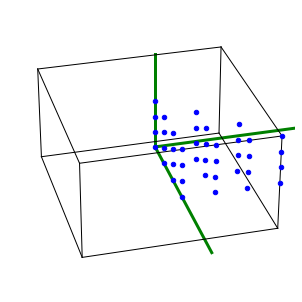

In [22]:
ebands.kpoints.plot()

In [4]:
smallchi0_test = XGChi0.Sym_chi0GG("Bulk2Atoms6_ecut8o_DS1_SUS.nc", omega = 0)

32


KeyboardInterrupt: 

In [119]:
print(smallchi0_test)

[[[-4.33701208e-09-5.90514850e-27j -3.40552392e-15-5.64263703e-16j
   -3.40552392e-15-5.64263703e-16j ...  1.21927814e-16+5.63472072e-16j
    1.21927814e-16+5.63472072e-16j  1.21927814e-16+5.63472072e-16j]
  [-3.40552392e-15+5.64263703e-16j -8.60809833e-02-6.06522471e-12j
    1.20867288e-03-1.48595372e-12j ... -1.41418861e-04-2.11629770e-11j
   -1.41418861e-04-2.11629770e-11j  3.81882103e-06+2.30958644e-12j]
  [-3.40552392e-15+5.64263703e-16j  1.20867288e-03-1.48595372e-12j
   -8.60809833e-02-6.06522471e-12j ...  3.81882103e-06+2.30958644e-12j
    3.81882103e-06+2.30958644e-12j -1.41418861e-04-2.11629770e-11j]
  ...
  [ 1.21927814e-16-5.63472072e-16j -1.41418861e-04+2.11384783e-11j
    3.81882177e-06-2.30151635e-12j ... -5.35925373e-03-4.63192674e-14j
    8.50993797e-06+6.43439024e-14j  6.77793032e-05+2.04480672e-13j]
  [ 1.21927814e-16-5.63472072e-16j -1.41418861e-04+2.11384783e-11j
    3.81882177e-06-2.30151635e-12j ...  8.50993797e-06+6.43439024e-14j
   -5.35925373e-03-4.63192674e-1

In [124]:
print(chi0GG_prim[0])

[[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -8.60809907e-02-2.55425594e-11j
   1.20867288e-03+3.67869658e-11j ... -1.41418874e-04-1.14800452e-11j
  -1.41418932e-04-2.14641152e-11j  3.81881637e-06-4.21508775e-13j]
 [ 0.00000000e+00+0.00000000e+00j  1.20867288e-03-3.97588733e-11j
  -8.60809758e-02+1.34121100e-11j ...  3.81883001e-06+3.47006712e-12j
   3.81882228e-06-2.05423981e-12j -1.41418641e-04-2.08285975e-11j]
 ...
 [ 0.00000000e+00+0.00000000e+00j -1.41418903e-04+1.13486321e-11j
   3.81883092e-06-3.41376385e-12j ... -5.35925943e-03-1.31042041e-13j
   8.50997094e-06-3.61045850e-12j  6.77793068e-05-1.32231509e-12j]
 [ 0.00000000e+00+0.00000000e+00j -1.41418903e-04+2.14195640e-11j
   3.81882228e-06+2.32535345e-12j ...  8.50997640e-06+2.80710828e-12j
  -5.35925943e-03+5.10051257e-13j  4.03362828e-

In [5]:
chi0GG_prim_test, ind_qG_to_vec, n1, n2, n3, ind_q_to_vec, ind_G_to_vec, G, nk = XGChi0.Build_Chi0GG("Bulk2Atoms6_ecut8o_DS1_SUS.nc", "FromSym", omega = 0)

32
43 43 55
the initialization of the dictionnaries and gathering of the information about the valid vectors took 4.898206949234009 seconds
32
The initialisation of smallchi0GG took 620.4758052825928 seconds
Sym ok
4.337012082800129e-09
4.337012082800129e-09
3.893263275244092e-15
3.893263275244092e-15
the building of chi0GG took  95.81184887886047 seconds


In [32]:
print(ind_qG_to_vec)

{0: (0.0, 0.0, 0.0), 1: (0.0, 0.0, 6.0), 2: (0.0, 0.0, -6.0), 3: (6.0, 0.0, 0.0), 4: (-6.0, 0.0, 0.0), 5: (0.0, 6.0, 0.0), 6: (0.0, -6.0, 0.0), 7: (6.0, 0.0, 6.0), 8: (-6.0, 0.0, -6.0), 9: (-6.0, 0.0, 6.0), 10: (6.0, 0.0, -6.0), 11: (0.0, 6.0, 6.0), 12: (0.0, -6.0, -6.0), 13: (0.0, 6.0, -6.0), 14: (0.0, -6.0, 6.0), 15: (6.0, 6.0, 0.0), 16: (-6.0, -6.0, 0.0), 17: (-6.0, 6.0, 0.0), 18: (6.0, -6.0, 0.0), 19: (0.0, 0.0, 12.0), 20: (0.0, 0.0, -12.0), 21: (6.0, 6.0, 6.0), 22: (-6.0, -6.0, -6.0), 23: (-6.0, 6.0, -6.0), 24: (6.0, -6.0, 6.0), 25: (-6.0, -6.0, 6.0), 26: (6.0, 6.0, -6.0), 27: (6.0, -6.0, -6.0), 28: (-6.0, 6.0, 6.0), 29: (6.0, 0.0, 12.0), 30: (-6.0, 0.0, -12.0), 31: (-6.0, 0.0, 12.0), 32: (6.0, 0.0, -12.0), 33: (0.0, 6.0, 12.0), 34: (0.0, -6.0, -12.0), 35: (0.0, 6.0, -12.0), 36: (0.0, -6.0, 12.0), 37: (12.0, 0.0, 0.0), 38: (-12.0, 0.0, 0.0), 39: (0.0, 12.0, 0.0), 40: (0.0, -12.0, 0.0), 41: (6.0, 6.0, 12.0), 42: (-6.0, -6.0, -12.0), 43: (-6.0, 6.0, -12.0), 44: (6.0, -6.0, 12.0), 45

In [34]:
qG_vec_to_ind = {}
for i in ind_qG_to_vec.keys():
    qG = ind_qG_to_vec[i]
    qG_vec_to_ind[qG] = i



In [36]:
i, j, k = 3, 6, 7
q = ind_q_to_vec[i]
G1 = ind_G_to_vec[j]
G2 = ind_G_to_vec[k]
qvec = [q[0], q[1], q[2]]
G1vec = [G1[0], G1[1], G1[2]]
G2vec = [G2[0], G2[1], G2[2]]
Sym = abipy.core.symmetries.AbinitSpaceGroup.from_structure(structure_prim)
SymR = Sym.symrec
nsym = len(SymR)
for i in range(nsym):
    S = SymR[i]
    Sq = np.matmul(S, qvec)
    SG1 = np.matmul(S, G1vec)
    SG2 = np.matmul(S, G2vec)
    SqG1 = Sq + SG1
    SqG2 = Sq + SG2
    print(Sq, SG1, SG2)
    if (SqG1[0], SqG1[1], SqG1[2]) in qG_vec_to_ind.keys() and (SqG2[0], SqG2[1], SqG2[2]) in qG_vec_to_ind.keys():
        indq = qvec_to_ind[(Sq[0], Sq[1], Sq[2])]
        indG1 = Gvec_to_ind[(SG1[0], SG1[1], SG1[2])]
        indG2 = Gvec_to_ind[(SG2[0], SG2[1], SG2[2])]
        print(chi0GG_prim_test[indq, indG1, indG2])

AttributeError: module 'abipy' has no attribute 'core'

In [29]:
chi0rr = XGChi0.FFT_chi0_sizeadapt(np.real(chi0GG_prim_test), ind_qG_to_vec, 48, 48, 66, 8, 8, 11, ind_q_to_vec, ind_G_to_vec, G, nk, opt2 = "Kaltak")

8 8 11
Starting first FFT


KeyboardInterrupt: 

In [17]:
np.save("chi0rr_SYM_bulk2Atoms_ecut8_666", chi0rr)

In [5]:
ngkpt_prim = [6, 6, 6] #has to be entered manually from the data given above
ngkpt_slab = [6, 6, 1]
nsym_var = 0

In [7]:
file_slab5 = "Slab5Atoms6_ecut8o_DS1_SUS.nc"
file_slab7 = "Slab7Atomso_DS1_SUS.nc"
file_slab3 = "Slab3Atomso_DS1_SUS.nc"
file_bulk = "Bulk2Atoms6_ecut8o_DS1_SUS.nc"

In [8]:
structure_prim=abipy.core.structure.Structure.from_file(file_bulk)
structure_prim

Structure Summary
Lattice
    abc : 2.8535866547158504 2.8535866547158504 4.035580948506026
 angles : 90.0 90.0 90.0
 volume : 32.86156131033388
      A : 2.017790474253013 -2.017790474253013 0.0
      B : 2.017790474253013 2.017790474253013 0.0
      C : 0.0 0.0 4.035580948506026
PeriodicSite: Al (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Al (2.0178, 0.0000, 2.0178) [0.5000, 0.5000, 0.5000]

In [5]:
Sym = abipy.core.symmetries.AbinitSpaceGroup.from_structure(structure_prim)
SymR = Sym.symrec
SymR

array([[[ 1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0,  1]],

       [[-1,  0,  0],
        [ 0, -1,  0],
        [ 0,  0, -1]],

       [[ 0, -1,  0],
        [ 1,  0,  0],
        [ 0,  0,  1]],

       [[ 0,  1,  0],
        [-1,  0,  0],
        [ 0,  0, -1]],

       [[-1,  0,  0],
        [ 0, -1,  0],
        [ 0,  0,  1]],

       [[ 1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0, -1]],

       [[ 0,  1,  0],
        [-1,  0,  0],
        [ 0,  0,  1]],

       [[ 0, -1,  0],
        [ 1,  0,  0],
        [ 0,  0, -1]],

       [[ 0,  1,  0],
        [ 1,  0,  0],
        [ 0,  0, -1]],

       [[ 0, -1,  0],
        [-1,  0,  0],
        [ 0,  0,  1]],

       [[ 1,  0,  0],
        [ 0, -1,  0],
        [ 0,  0, -1]],

       [[-1,  0,  0],
        [ 0,  1,  0],
        [ 0,  0,  1]],

       [[ 0, -1,  0],
        [-1,  0,  0],
        [ 0,  0, -1]],

       [[ 0,  1,  0],
        [ 1,  0,  0],
        [ 0,  0,  1]],

       [[-1,  0,  0],
        [ 0,  1,  0],
    

In [20]:
structure_slab5=abipy.core.structure.Structure.from_file(file_slab5)
structure_slab5

Structure Summary
Lattice
    abc : 2.8535866547158504 2.8535866547158504 20.17790474253013
 angles : 90.0 90.0 90.0
 volume : 164.30780655166944
      A : 2.017790474253013 -2.017790474253013 0.0
      B : 2.017790474253013 2.017790474253013 0.0
      C : 0.0 0.0 20.17790474253013
PeriodicSite: Al (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Al (0.0000, 2.0178, 2.0178) [-0.5000, 0.5000, 0.1000]
PeriodicSite: Al (0.0000, 0.0000, 4.0356) [0.0000, 0.0000, 0.2000]
PeriodicSite: Al (0.0000, 2.0178, -2.0178) [-0.5000, 0.5000, -0.1000]
PeriodicSite: Al (0.0000, 0.0000, -4.0356) [0.0000, 0.0000, -0.2000]

In [24]:
structure_slab3=abipy.core.structure.Structure.from_file(file_slab3)
structure_slab3

Structure Summary
Lattice
    abc : 2.8535866547158504 2.8535866547158504 16.142323794024104
 angles : 90.0 90.0 90.0
 volume : 131.44624524133553
      A : 2.017790474253013 -2.017790474253013 0.0
      B : 2.017790474253013 2.017790474253013 0.0
      C : 0.0 0.0 16.142323794024104
PeriodicSite: Al (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Al (0.0000, 2.0178, 2.0178) [-0.5000, 0.5000, 0.1250]
PeriodicSite: Al (0.0000, 2.0178, -2.0178) [-0.5000, 0.5000, -0.1250]

In [26]:
structure_slab7=abipy.core.structure.Structure.from_file(file_slab7)
structure_slab7

Structure Summary
Lattice
    abc : 2.8535866547158504 2.8535866547158504 24.21348569103616
 angles : 90.0 90.0 90.0
 volume : 197.16936786200333
      A : 2.017790474253013 -2.017790474253013 0.0
      B : 2.017790474253013 2.017790474253013 0.0
      C : 0.0 0.0 24.21348569103616
PeriodicSite: Al (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Al (0.0000, 2.0178, 2.0178) [-0.5000, 0.5000, 0.0833]
PeriodicSite: Al (0.0000, 0.0000, 4.0356) [0.0000, 0.0000, 0.1667]
PeriodicSite: Al (0.0000, 2.0178, 6.0534) [-0.5000, 0.5000, 0.2500]
PeriodicSite: Al (0.0000, 2.0178, -2.0178) [-0.5000, 0.5000, -0.0833]
PeriodicSite: Al (0.0000, 0.0000, -4.0356) [0.0000, 0.0000, -0.1667]
PeriodicSite: Al (0.0000, 2.0178, -6.0534) [-0.5000, 0.5000, -0.2500]

# Test Symmetries

In [10]:
qvec_to_ind = {}
for i in ind_q_to_vec.keys():
    q = ind_q_to_vec[i]
    qvec_to_ind[q] = i

In [11]:
Gvec_to_ind = {}
for i in ind_G_to_vec.keys():
    Gvec = ind_G_to_vec[i]
    Gvec_to_ind[Gvec] = i

In [17]:
i, j, k = 2, 3, 1
q = ind_q_to_vec[i]
G1 = ind_G_to_vec[j]
G2 = ind_G_to_vec[k]
qvec = [q[0], q[1], q[2]]
G1vec = [G1[0], G1[1], G1[2]]
G2vec = [G2[0], G2[1], G2[2]]
Sym = abipy.core.symmetries.AbinitSpaceGroup.from_structure(structure_prim)
SymR = Sym.symrec
nsym = len(SymR)
for i in range(nsym):
    S = SymR[i]
    Sq = np.matmul(S, qvec)
    SG1 = np.matmul(S, G1vec)
    SG2 = np.matmul(S, G2vec)
    if (Sq[0], Sq[1], Sq[2]) in qvec_to_ind.keys() and (SG1[0], SG1[1], SG1[2]) in Gvec_to_ind.keys() and (SG2[0], SG2[1], SG2[2]) in Gvec_to_ind.keys():
        indq = qvec_to_ind[(Sq[0], Sq[1], Sq[2])]
        indG1 = Gvec_to_ind[(SG1[0], SG1[1], SG1[2])]
        indG2 = Gvec_to_ind[(SG2[0], SG2[1], SG2[2])]
        print(chi0GG_prim[indq, indG1, indG2])


(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156047038733959-9.092418196132712e-08j)
(0.007156047038733959-9.092418196132712e-08j)
(0.007156047038733959-9.092418196132712e-08j)
(0.007156047038733959-9.092418196132712e-08j)
(0.007156047038733959-9.092418196132712e-08j)
(0.007156047038733959-9.092418196132712e-08j)
(0.007156047038733959-9.092418196132712e-08j)
(0.007156047038733959-9.092418196132712e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.067402118034806e-08j)
(0.007156033534556627+9.0674021180

# Figures


In [27]:
chi0rrbulk = np.load("chi0rr_bulk2atoms6_ecut8.npy")

In [5]:
Vbulk = 32.86156131033388*6**3
Vslab3 = 131.44624524133553*36
Vslab7 = 197.16936786200333*36
Vslab5 = 164.30780655166944*36

In [44]:
vec_bulk1 = XGChi0.Rev_vec(chi0rrbulk[0, 0, 0, 0, 0, :])/Vbulk
vec_bulk2 = XGChi0.Rev_vec(chi0rrbulk[2, 2, 2, 2, 2, :])/Vbulk

In [52]:
chi0rrslab = np.load("chi0rr_slab3atoms6_ecut8.npy")

In [53]:
vec_slab3_1 = XGChi0.Rev_vec(chi0rrslab[0, 0, 0, 0, 0, :], pair = True)/Vslab3
vec_slab3_2 = XGChi0.Rev_vec(chi0rrslab[2, 2, 2, 2, 2, :], pair = True)/Vslab3

In [8]:
a, b, c = 2.8535866547158504,  2.8535866547158504, 4.035580948506026
d, e, f = 4.035580948506026*4, 4.035580948506026*5, 4.035580948506026*6

X1 = np.linspace(-a*3, a*3, 48, endpoint=False)
X2 = np.linspace(-f/2, f/2, 66, endpoint = False)

Xs3 = np.linspace(-d/2, d/2, 44, endpoint = False)
Xs4 = np.linspace(-e/2, e/2, 55, endpoint= True)

In [64]:
trace1 = go.Scatter(x = X2,y = vec_bulk1,mode = "lines+markers")

trace2 = go.Scatter(x = Xs3,y = vec_slab3_1,mode = "lines+markers")

trace3 = go.Scatter(x = Xs4,y = vec_slab5_1,mode = "lines+markers")

trace4 = go.Scatter(x = X2,y = vec_slab7_1,mode = "lines+markers")

In [65]:
data = [ trace1, trace2, trace3, trace4]
layout = dict(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)
fig = go.Figure(dict(data = data, layout = layout))
fig.show(dpi = 300)

In [68]:
trace1 = go.Scatter(x = X2,y = vec_bulk2,mode = "lines+markers")

trace2 = go.Scatter(x = Xs3,y = vec_slab3_2,mode = "lines+markers")

trace3 = go.Scatter(x = Xs4,y = vec_slab5_2,mode = "lines+markers")

trace4 = go.Scatter(x = X2,y = vec_slab7_2,mode = "lines+markers")

data = [ trace1, trace2, trace3, trace4]
layout = dict(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)
fig = go.Figure(dict(data = data, layout = layout))
fig.show(dpi = 300)

In [112]:
375/3*7

875.0

In [18]:
chargeb = XGChi0.charge_accul_cut(chi0rr/Vbulk, 2, "xz", 0)

Max charge accumulation =  2.822959521403692


In [14]:
print(chargeb.shape)

(9, 67)


In [19]:
fig = go.Figure(data = go.Contour(z = np.real(chargeb), x = np.linspace(-c/2, c/2, 12, endpoint = True), y = np.linspace(-a/2, a/2, 9, endpoint=True), colorscale='sunset', line_smoothing=0.85, contours_coloring='heatmap'))

fig.update_layout(
    autosize=False,
    width=800,
    height=570,
    )

fig.show(dpi = 300)

In [12]:
layout = dict(
    value = "viridis",
)
fig = go.Figure(data = go.Contour(z = np.real(chargeb), x = np.linspace(-c/2, c/2, 66, endpoint = True), y = np.linspace(-a/2, a/2, 9, endpoint=True), colorscale='sunset', line_smoothing=0.85, contours_coloring='heatmap'))

fig.update_layout(
    autosize=False,
    width=800,
    height=570,
    )

fig.show(dpi = 300)

In [96]:
chi0rrs3 = np.load("chi0rr_slab3atoms6_ecut8.npy")
charges3 = XGChi0.charge_accul_cut(chi0rrs3/Vslab3, 2, "xz", 0)

Max charge accumulation =  3.1686188107242845


In [99]:
layout = dict(
    value = "viridis",
)
fig = go.Figure(data = go.Contour(z = np.real(charges3), x = np.linspace(-d/2, d/2, 45, endpoint = True), y = np.linspace(-a/2, a/2, 9, endpoint=True), colorscale='sunset', line_smoothing=0.85, contours_coloring='heatmap'))

fig.update_layout(
    autosize=False,
    width=2400,
    height=570,
    )

fig.show(dpi = 300)

In [100]:
chi0rrs5 = np.load("chi0rr_slab5atoms6_ecut8.npy")
charges5 = XGChi0.charge_accul_cut(chi0rrs5/Vslab5, 2, "xz", 0)

Max charge accumulation =  3.231116800460282


In [101]:
fig = go.Figure(data = go.Contour(z = np.real(charges5), x = np.linspace(-e/2, e/2, 56, endpoint = True), y = np.linspace(-a/2, a/2, 9, endpoint=True), colorscale='sunset', line_smoothing=0.85, contours_coloring='heatmap'))

fig.update_layout(
    autosize=False,
    width=3200,
    height=570,
    )

fig.show(dpi = 300)

In [102]:
chi0rrs7 = np.load("chi0rr_slab7atoms6_ecut8.npy")
charges7 = XGChi0.charge_accul_cut(chi0rrs7/Vslab7, 2, "xz", 0)

Max charge accumulation =  3.168596800009077


In [104]:
fig = go.Figure(data = go.Contour(z = np.real(charges7), x = np.linspace(-f/2, f/2, 67, endpoint = True), y = np.linspace(-a/2, a/2, 9, endpoint=True), colorscale='sunset', line_smoothing=0.85, contours_coloring='heatmap'))

fig.update_layout(
    autosize=False,
    width=4000,
    height=570,
    )

fig.show(dpi = 300)

In [106]:
XGChi0.getDen("STMSlab6", 401, 161)

-20.0 20.0 -3.0 3.0


ValueError: cannot reshape array of size 24461 into shape (161,401)